In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
currency = "JPYUSD=X"
data = yf.download(currency)[["Adj Close"]].copy()
data["logreturn"] = np.log(data['Adj Close']).diff()

[*********************100%***********************]  1 of 1 completed


In [3]:
# Get 12 month momentum
data["momentum"] = np.log(data['Adj Close']).diff(12).shift(1)

# get the signal generated by momentum
data["signal"] = np.where(data["momentum"] >0, 1, -1)

In [5]:
data.head()

,Adj Close,logreturn,momentum,signal
Date,,,,
1996-10-30 00:00:00+00:00,0.008758,NaN,NaN,-1
1996-11-01 00:00:00+00:00,0.008811,0.005973,NaN,-1
1996-11-04 00:00:00+00:00,0.008781,-0.003342,NaN,-1
1996-11-05 00:00:00+00:00,0.008753,-0.003244,NaN,-1
1996-11-06 00:00:00+00:00,0.008776,0.002629,NaN,-1


$\text{strategy return}=exp[(\sum_{i=0}^T logreturn_t)-1]$

<AxesSubplot:xlabel='Date'>

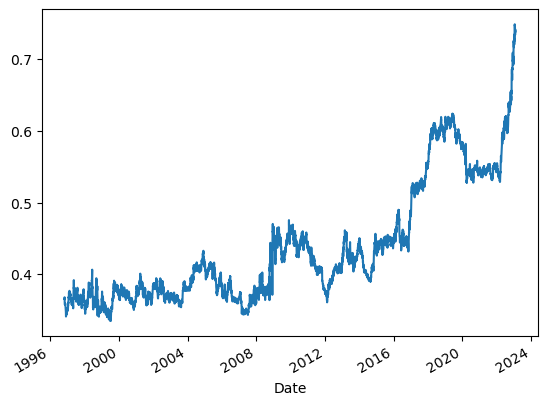

In [6]:
# Calculate the equity curve (use cumsum())
data['strat'] = np.exp((data['signal'].shift()*data['logreturn']).cumsum()-1)
data['strat'].plot()

$CCROR = ln(\frac{A}{P})/Y$

Where:
- A is the final portfolio value
- P is the principal
- Y is the number of years we invest

In [7]:
# calculate the ccror of the strategy

p = 10000
A = (data['strat'][-1]+1)*p
A

17380.908002795964

In [8]:
np.log(A/p)/((len(data)/252))*100

2.0467586238420257